In [1]:
import numpy as np
import pickle
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import CMR_IA as cmr
import scipy as sp
from matplotlib.lines import Line2D

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVEFIG = True

## Load Stimuli and Semantic Matrix

In [2]:
with open("simu6a_data/simu6a_design.pkl", "rb") as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 100]  # for testing
# df_test = df_test.loc[df_test.session < 100]  # for testing

In [3]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,list,session
0,1569,1107,VINEGAR,PORCUPINE,0,0
1,30,696,APARTMENT,HEADBAND,0,0
2,1457,1443,THIGH,TECHNICIAN,0,0
3,1331,31,SNACK,APE,0,0
4,1377,1579,STEP,WAIST,0,0
...,...,...,...,...,...,...
251995,842,1335,LOLLIPOP,SNOB,41,999
251996,260,57,CATHEDRAL,ATTIRE,41,999
251997,946,1306,NET,SIGNATURE,41,999
251998,164,981,BRACES,ORCHESTRA,41,999


In [4]:
df_test

,test_itemno,test_item,correct_ans,lag,list,session,order
0,468,DINNER,681,0,0,0,2
1,1579,WAIST,1377,2,0,0,2
2,1331,SNACK,31,4,0,0,1
3,1457,THIGH,1443,6,0,0,1
4,696,HEADBAND,30,8,0,0,2
...,...,...,...,...,...,...,...
251995,981,ORCHESTRA,164,2,41,999,2
251996,946,NET,1306,4,41,999,1
251997,57,ATTIRE,260,6,41,999,2
251998,842,LOLLIPOP,1335,8,41,999,1


In [5]:
s_mat = np.load("../wordpools/ltp_FR_similarity_matrix.npy")

## Run CMR-IA

In [7]:
# define parameters
params = cmr.make_default_params()
params.update(
    beta_enc=0.7,
    beta_cue=0.55,
    beta_distract=0.01,
    beta_rec_post=0.99,
    beta_rec=0.5,
    gamma_fc=0.28,
    gamma_cf=0.28,
    s_fc=0.1,
    s_cf=0.1,
    c_thresh=0.01,
    kappa=0.04,
    lamb=0.02,
    eta=0.01,
    alpha=0.9,
    omega=3,
    phi_s=0.4,
    phi_d=1.3,
    nitems_in_accumulator=48,
    use_new_context=True,
)
params

{'beta_enc': 0.7,
 'beta_rec': 0.5,
 'beta_cue': 0.55,
 'beta_rec_post': 0.99,
 'beta_distract': 0.01,
 'phi_s': 0.4,
 'phi_d': 1.3,
 's_cf': 0.1,
 's_fc': 0.1,
 'kappa': 0.04,
 'eta': 0.01,
 'omega': 3,
 'alpha': 0.9,
 'c_thresh': 0.01,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 0,
 'lamb': 0.02,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.28,
 'gamma_cf': 0.28,
 'use_new_context': True}

In [8]:
# run CMR-IA
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params, df_study, df_test, s_mat)
df_simu

CMR2 Time: 635.3867840766907


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,468,681.0,2180.0,0.647646
1,0,0,1579,-1.0,-1.0,-1.000000
2,0,0,1331,31.0,4850.0,0.461680
3,0,0,1457,-1.0,-1.0,-1.000000
4,0,0,696,-1.0,-1.0,-1.000000
...,...,...,...,...,...,...
251995,41,999,981,-1.0,-1.0,-1.000000
251996,41,999,946,-1.0,-1.0,-1.000000
251997,41,999,57,164.0,3820.0,0.415744
251998,41,999,842,-1.0,-1.0,-1.000000


In [9]:
# merge to get more info
df_simu = df_simu.merge(df_test, on=["session", "list", "test_itemno"])
df_simu["correct"] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,order,correct
0,0,0,468,681.0,2180.0,0.647646,DINNER,681,0,2,True
1,0,0,1579,-1.0,-1.0,-1.000000,WAIST,1377,2,2,False
2,0,0,1331,31.0,4850.0,0.461680,SNACK,31,4,1,True
3,0,0,1457,-1.0,-1.0,-1.000000,THIGH,1443,6,1,False
4,0,0,696,-1.0,-1.0,-1.000000,HEADBAND,30,8,2,False
...,...,...,...,...,...,...,...,...,...,...,...
251995,41,999,981,-1.0,-1.0,-1.000000,ORCHESTRA,164,2,2,False
251996,41,999,946,-1.0,-1.0,-1.000000,NET,1306,4,1,False
251997,41,999,57,164.0,3820.0,0.415744,ATTIRE,260,6,2,False
251998,41,999,842,-1.0,-1.0,-1.000000,LOLLIPOP,1335,8,1,False


In [10]:
# merge f_in info, for testing
sessions = np.unique(df_simu.session)
for sess in sessions:
    df_tmp = df_study.loc[df_study.session == sess]
    tmp1 = df_tmp.study_itemno1.to_numpy()
    tmp2 = df_tmp.study_itemno2.to_numpy()
    tmp = np.concatenate((tmp1, tmp2))
    tmp = np.sort(tmp)
    tmp_test = df_simu.loc[df_study.session == sess, "test_itemno"]
    tmp_corr = df_simu.loc[df_study.session == sess, "correct_ans"]
    testid = np.searchsorted(tmp, tmp_test)
    corrid = np.searchsorted(tmp, tmp_corr)

    df_simu.loc[df_simu.session == sess, "corr_fin"] = [f_dif[sess][i][id] for i, id in enumerate(corrid)]
    # df_simu.loc[df_simu.session == sess, 'omean_fin'] = [np.mean(np.delete(f_dif[sess][i], id)) for i, id in corrid]
    df_simu.loc[df_simu.session == sess, "omax_fin"] = [np.max(np.delete(f_dif[sess][i], id)) for i, id in enumerate(corrid)]
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,order,correct,corr_fin,omax_fin
0,0,0,468,681.0,2180.0,0.647646,DINNER,681,0,2,True,-0.368410,-0.583671
1,0,0,1579,-1.0,-1.0,-1.000000,WAIST,1377,2,2,False,-0.616849,-0.637418
2,0,0,1331,31.0,4850.0,0.461680,SNACK,31,4,1,True,-0.557395,-0.652676
3,0,0,1457,-1.0,-1.0,-1.000000,THIGH,1443,6,1,False,-0.619125,-0.633773
4,0,0,696,-1.0,-1.0,-1.000000,HEADBAND,30,8,2,False,-0.584353,-0.635459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,41,999,981,-1.0,-1.0,-1.000000,ORCHESTRA,164,2,2,False,-0.561374,-0.705225
251996,41,999,946,-1.0,-1.0,-1.000000,NET,1306,4,1,False,-0.615264,-0.585718
251997,41,999,57,164.0,3820.0,0.415744,ATTIRE,260,6,2,False,-0.584045,-0.612484
251998,41,999,842,-1.0,-1.0,-1.000000,LOLLIPOP,1335,8,1,False,-0.599506,-0.627126


In [11]:
df_simu.to_pickle("simu6a_data/simu6a_result.pkl")

## Analysis

In [12]:
with open("simu6a_data/simu6a_result.pkl", "rb") as inp:
    df_simu = pickle.load(inp)

In [13]:
# clean first 2 list
df_simu = df_simu.query("list > 1")
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,order,correct,corr_fin,omax_fin
12,2,0,887,816.0,2520.0,0.618097,MERMAID,816,0,1,True,-0.422448,-0.554054
13,2,0,10,1101.0,2660.0,0.490220,AGENT,1101,2,1,True,-0.526379,-0.685806
14,2,0,1411,-1.0,-1.0,-1.000000,SUPPER,1561,4,2,False,-0.642713,-0.637361
15,2,0,959,1104.0,2610.0,0.486860,NOTEBOOK,1104,6,2,True,-0.526159,-0.660323
16,2,0,1448,969.0,3220.0,0.436639,TEMPLE,969,8,2,True,-0.572861,-0.669362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,41,999,981,-1.0,-1.0,-1.000000,ORCHESTRA,164,2,2,False,-0.561374,-0.705225
251996,41,999,946,-1.0,-1.0,-1.000000,NET,1306,4,1,False,-0.615264,-0.585718
251997,41,999,57,164.0,3820.0,0.415744,ATTIRE,260,6,2,False,-0.584045,-0.612484
251998,41,999,842,-1.0,-1.0,-1.000000,LOLLIPOP,1335,8,1,False,-0.599506,-0.627126


### f_IN

In [14]:
df_fin = df_simu.groupby("lag")[["corr_fin", "omax_fin"]].mean().reset_index()
df_fin["dif"] = df_fin["corr_fin"] - df_fin["omax_fin"]
df_fin

,lag,corr_fin,omax_fin,dif
0,0,-0.406026,-0.587214,0.181188
1,2,-0.576003,-0.660787,0.084784
2,4,-0.600306,-0.633369,0.033063
3,6,-0.585910,-0.614527,0.028616
4,8,-0.590335,-0.610081,0.019746
5,10,-0.584281,-0.615264,0.030982


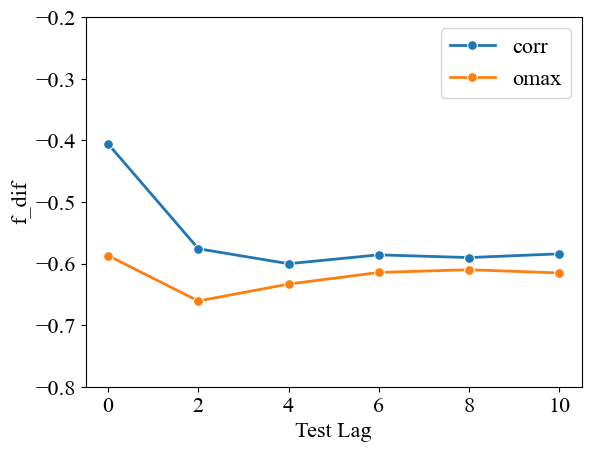

In [15]:
sns.lineplot(data=df_fin, x="lag", y="corr_fin", linewidth=2, marker="o", markersize=7, label="corr")
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
sns.lineplot(data=df_fin, x="lag", y="omax_fin", linewidth=2, marker="o", markersize=7, label="omax")
plt.ylim([-0.8, -0.2])
plt.xlabel("Test Lag")
plt.ylabel("f_dif")
plt.show()

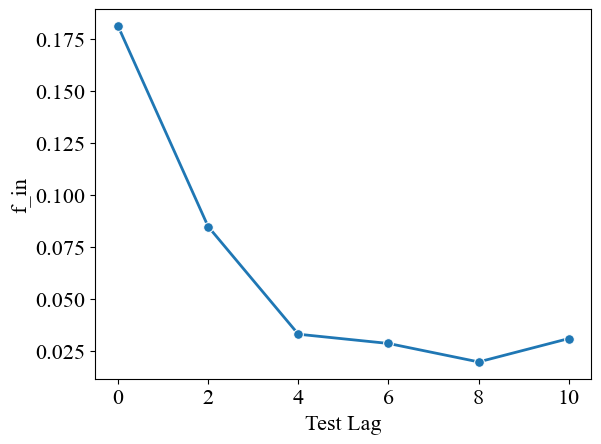

In [16]:
sns.lineplot(data=df_fin, x="lag", y="dif", linewidth=2, marker="o", markersize=7)
# plt.ylim([0,1])
plt.xlabel("Test Lag")
plt.ylabel("f_in")
plt.show()

### Yes rate

In [17]:
# session-wise, calculate correct rate for each condition
df_sess_lag = df_simu.groupby(["session", "lag", "order"]).correct.mean().to_frame(name="correct_rate").reset_index()
df_sess_lag

,session,lag,order,correct_rate
0,0,0,1,1.000000
1,0,0,2,0.958333
2,0,2,1,0.714286
3,0,2,2,0.526316
4,0,4,1,0.100000
...,...,...,...,...
11995,999,6,2,0.473684
11996,999,8,1,0.333333
11997,999,8,2,0.214286
11998,999,10,1,0.428571


In [18]:
# collapse across sessions
df_lag = df_sess_lag.groupby(["lag", "order"]).correct_rate.mean().to_frame(name="correct_rate").reset_index()
df_lag

,lag,order,correct_rate
0,0,1,0.981332
1,0,2,0.982732
2,2,1,0.588287
3,2,2,0.586650
4,4,1,0.344460
5,4,2,0.338602
6,6,1,0.264241
7,6,2,0.266852
8,8,1,0.249104
9,8,2,0.255509


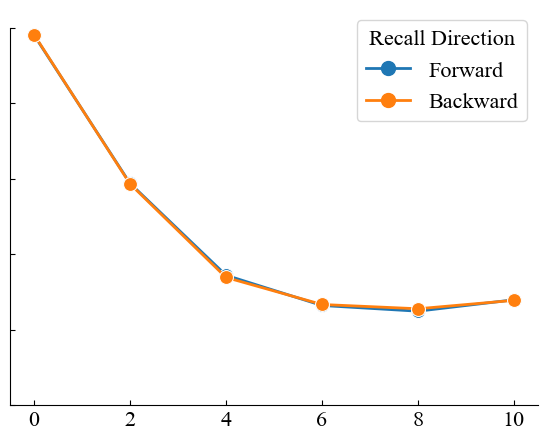

In [19]:
fig, ax = plt.subplots(figsize=(6, 4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines["left"].set_bounds(0, 1)
ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")
sns.lineplot(data=df_lag, x="lag", y="correct_rate", linewidth=2, marker="o", markersize=10, hue="order", palette="tab10")
plt.ylim([0, 1.05])
plt.xlabel("Test Lag")
plt.ylabel("Probablility of Recall")

legend_elements = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, marker="o", markersize=10, linestyle="-", label="Forward"),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, marker="o", markersize=10, linestyle="-", label="Backward"),
]
L = plt.legend(handles=legend_elements, title="Recall Direction", loc="upper right")

if SAVEFIG:
    ax.set(xlabel=None, ylabel=None)
    plt.tick_params(labelleft=False)
    plt.savefig("simu6a_fig/simu6a_recall.pdf")